I.請將自變數X的欄位用'LSTAT'，再用線性回歸模型估算
a. 預測係數。
b. 繪製預測結果和實際結果的散佈圖。
c. 整體預測結果分析。

In [1]:
!pip install scikit-learn==1.1.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 資料模組
from sklearn.datasets import load_boston
boston = load_boston()
# 建立 DataFrame
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']

X = df[['LSTAT']]
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

模型預測的係數 35.2251661672225 [-0.98053701]


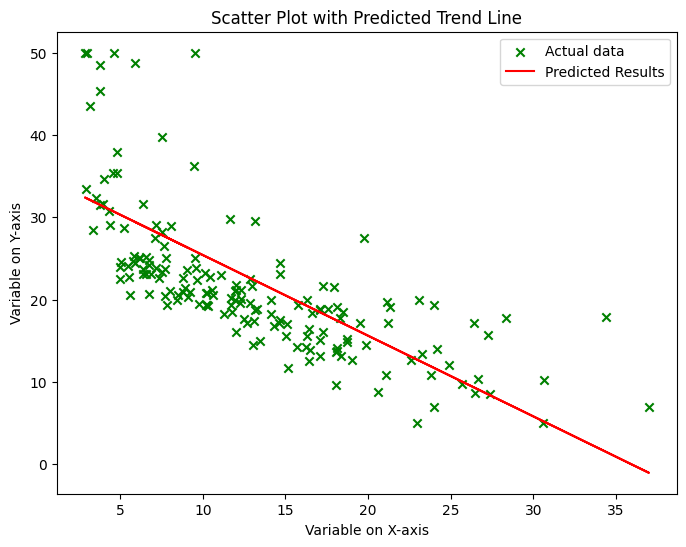

Mean Squred Error: 38.410075117662345
Mean Absolute Error: 4.744269760624963
R2 Score: 0.49245729145962347


In [2]:
#a. 預測係數
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('模型預測的係數', model.intercept_, model.coef_)
#b. 繪製預測結果和實際結果的散佈圖
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, marker='x', c='green', label='Actual data')
plt.plot(X_test, y_pred, c='r', label='Predicted Results')
plt.xlabel('Variable on X-axis')
plt.ylabel('Variable on Y-axis')
plt.title('Scatter Plot with Predicted Trend Line')
plt.legend()
plt.show()
#c. 整體預測結果分析
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

II.請將上例的X先三次方化，再進行一次預測。
a. 預測係數。
b. 繪製預測結果和實際結果的散佈圖。
c. 整體預測結果分析。

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

模型預測的係數 49.21529013606193 [ 0.00000000e+00 -3.85946424e+00  1.44458484e-01 -1.89103933e-03]


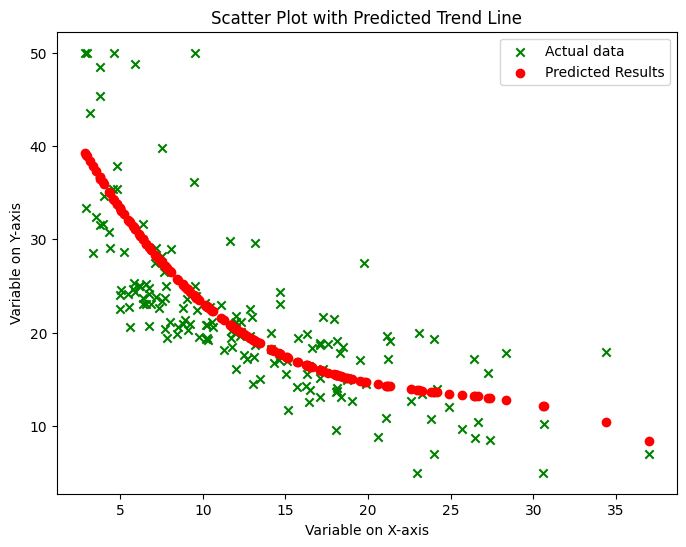

Mean Squred Error: 30.66871726088642
Mean Absolute Error: 4.119200933191487
R2 Score: 0.5947499769691513


In [ ]:
# Load
from sklearn.preprocessing import PolynomialFeatures
boston = load_boston()
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']
X = df[['LSTAT']]
y = df['target']
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

#a. 預測係數
print('模型預測的係數', model.intercept_, model.coef_)

# 繪製預測結果和實際結果的散佈圖
y_pred = model.predict(X_test)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_test[:,1], y_test, marker='x', c='green', label='Actual data')
plt.scatter(X_test[:,1], y_pred, c='r', label='Predicted Results')
plt.xlabel('Variable on X-axis')
plt.ylabel('Variable on Y-axis')
plt.title('Scatter Plot with Predicted Trend Line')
plt.legend();
plt.show()
#c. 整體預測結果分析
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))